In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
def train(X_train,y_train,X_test):
 """ Trains and predicts dataset with a Random Forest classifier """
 clf=RandomForestClassifier(n_estimators=40,oob_score=True)
 clf.fit(X_train,y_train)
 print("The best classifier is: ",clf)
 scores = model_selection.cross_val_score(clf, X_train,y_train, cv=5)
 print(scores)
 print('Estimated score: %0.5f (+/- %0.5f)' % (scores.mean(), scores.std() / 2))
 title = 'Learning Curves (Random Forest)'
 y_pred = clf.predict(X_test)
 return y_test,y_pred
 return y_test,y_pred


3977
(3977, 10)
(3977,)
spliting datasets in train and test dataset...

training datasets.......

The best classifier is:  RandomForestClassifier(n_estimators=40, oob_score=True)
[0.99843014 0.99213836 0.99685535 0.99213836 0.99213836]
Estimated score: 0.99434 (+/- 0.00137)


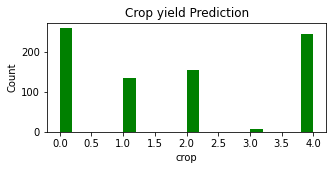

Classification Accuracy on Test dataset:  0.9949748743718593


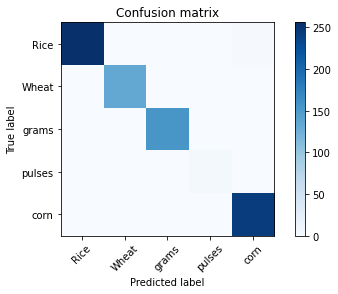

Confusion matrix, without normalization
[[256   0   0   0   2]
 [  0 134   0   0   0]
 [  1   0 154   0   0]
 [  1   0   0   5   0]
 [  0   0   0   0 243]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       258
         1.0       1.00      1.00      1.00       134
         2.0       1.00      0.99      1.00       155
         3.0       1.00      0.83      0.91         6
         4.0       0.99      1.00      1.00       243

    accuracy                           0.99       796
   macro avg       1.00      0.96      0.98       796
weighted avg       0.99      0.99      0.99       796



In [3]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
 target_names=['Rice','Wheat','grams','pulses','corn']
 plt.imshow(cm, interpolation='nearest', cmap=cmap)
 plt.title(title)
 plt.colorbar()
 tick_marks = np.arange(len(target_names))
 plt.xticks(tick_marks, target_names, rotation=45)
 plt.yticks(tick_marks, target_names)
 plt.tight_layout()
 plt.ylabel('True label')
 plt.xlabel('Predicted label')
 plt.show()
mydata=pd.read_csv("/content/finalyield.csv")
mydata[0:11]
print(len(mydata))
X=mydata[[ 'Moisture','rainfall','Average Humidity','Mean Temp','max Temp','Min temp','alkaline','sandy','chalky','clay']].values
print(X.shape)
X[0:9]
y=mydata["millet yield"]
print(y.shape)
y[0:11]
print("spliting datasets in train and test dataset...\n")
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=44)
print("training datasets.......\n")
y_test,y_pred = train(X_train,y_train,X_test)
plt.figure(figsize=(5,2))
x = y_test
plt.hist (x, bins = 20, color = "green")
plt.title ("Crop yield Prediction")
plt.xlabel ("crop")
plt.ylabel ("Count")
plt.show ()
print ('Classification Accuracy on Test dataset: ' ,accuracy_score(y_test, y_pred))
cm=confusion_matrix (y_test, y_pred)
plot_confusion_matrix (cm)
print('Confusion matrix, without normalization')
print(cm)
print(metrics.classification_report(y_test,y_pred))

In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
mydata=pd.read_csv("/content/finalyield.csv")

In [5]:
!pip install scikit-learn==0.22
!conda install scikit-learn=0.22

     |████████████████████████████████| 7.0 MB 4.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.22 which is incompatible.


/bin/bash: conda: command not found


In [6]:
X=mydata[['Moisture','rainfall','Average Humidity','Mean Temp','max Temp','Min temp','alkaline','sandy','chalky','clay']].values
print(X.shape)
X[0:10]
y = mydata["millet yield"]
print(y.shape)
y[0:11]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape, y_train.shape)
X_train=preprocessing.scale(X_train)
X_test=preprocessing.scale(X_test)
print ('Test set:', X_test.shape, y_test.shape)
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred[0:11]
from sklearn.metrics import f1_score

from sklearn.metrics import jaccard_score
print("Avg F1-score: %.4f" % f1_score(y_test, y_pred, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, y_pred,average='weighted'))
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4])
np.set_printoptions(precision=2)
print (metrics.classification_report(y_test, y_pred))

(3977, 10)
(3977,)
Train set: (3181, 10) (3181,)
Test set: (796, 10) (796,)
Avg F1-score: 0.7693
Jaccard score: 0.6314
              precision    recall  f1-score   support

         0.0       0.79      0.72      0.75       266
         1.0       0.86      1.00      0.92       128
         2.0       0.78      0.77      0.78       149
         3.0       0.57      0.80      0.67         5
         4.0       0.70      0.71      0.70       248

    accuracy                           0.77       796
   macro avg       0.74      0.80      0.77       796
weighted avg       0.77      0.77      0.77       796



In [7]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

3977
      Unnamed: 0   Moisture  rainfall  ...  chalky  clay  millet yield
0              0  12.801685  0.012360  ...       1     0           0.0
1              1  12.851654  0.004172  ...       0     0           0.0
2              2  12.776773  0.000000  ...       0     1           1.0
3              3  12.942001  0.031747  ...       0     1           1.0
4              4  12.984652  0.000000  ...       1     0           4.0
...          ...        ...       ...  ...     ...   ...           ...
3972        3972  12.959730  0.000000  ...       0     0           4.0
3973        3973  12.985416  0.000000  ...       0     0           4.0
3974        3974  12.947405  0.000300  ...       0     1           0.0
3975        3975  12.771689  0.000000  ...       0     0           4.0
3976        3976  12.845779  0.010131  ...       0     0           0.0

[3977 rows x 12 columns]
(3977, 9)
(3977,)
Trainset: (3181, 9) (3181,)
Testset: (796, 9) (796,)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  check_consistent_length(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  if y_type == 'multiclass':
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

[2. 4. 1. 0. 2. 4. 0. 4. 4. 4. 0. 0. 0. 1. 1. 4. 4. 1. 2. 0. 0. 0. 4. 2.
 2. 1. 1. 4. 0. 0. 1. 1. 2. 2. 4. 0. 0. 0. 2. 2. 4. 2. 4. 2. 2. 4. 4. 2.
 1. 4. 4. 0. 1. 4. 2. 0. 4. 0. 4. 2. 2. 4. 2. 2. 2. 0. 4. 1. 4. 0. 4. 2.
 4. 0. 0. 0. 0. 0. 2. 0. 4. 0. 4. 4. 4. 0. 0. 0. 0. 4. 4. 4. 1. 0. 1. 1.
 4. 0. 1. 1. 2. 0. 2. 1. 1. 0. 4. 0. 0. 4. 0. 4. 0. 1. 0. 4. 1. 0. 4. 4.
 2. 2. 0. 4. 1. 1. 4. 0. 0. 0. 0. 0. 0. 4. 0. 4. 2. 4. 0. 4. 0. 0. 0. 1.
 4. 2. 4. 4. 4. 4. 2. 1. 2. 4. 2. 2. 0. 2. 1. 2. 0. 1. 4. 1. 1. 4. 0. 2.
 2. 0. 0. 1. 1. 4. 1. 0. 4. 4. 0. 1. 4. 4. 0. 1. 4. 0. 0. 1. 2. 1. 4. 0.
 2. 0. 4. 4. 1. 4. 4. 2. 0. 2. 0. 4. 2. 2. 2. 4. 1. 0. 2. 0. 2. 0. 0. 0.
 2. 2. 1. 0. 0. 0. 0. 0. 2. 4. 1. 0. 0. 4. 4. 0. 4. 4. 4. 1. 1. 2. 2. 0.
 0. 4. 0. 4. 4. 2. 4. 0. 0. 1. 1. 0. 1. 1. 2. 4. 2. 1. 0. 4. 1. 0. 0. 1.
 4. 2. 0. 1. 4. 1. 0. 0. 2. 4. 4. 0. 0. 2. 0. 2. 1. 2. 2. 2. 2. 2. 0. 1.
 4. 1. 0. 2. 0. 0. 0. 0. 0. 4. 4. 4. 2. 1. 0. 2. 4. 1. 2. 1. 4. 4. 0. 1.
 2. 4. 1. 4. 2. 2. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 2.

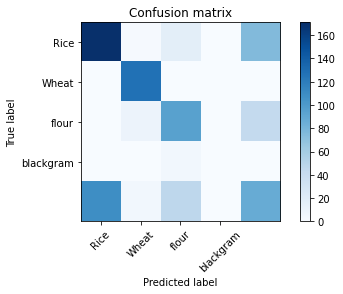

In [8]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
 target_names=['Rice','Wheat','flour','blackgram']
 plt.imshow(cm, interpolation='nearest', cmap=cmap)
 plt.title(title)
 plt.colorbar()
 tick_marks = np.arange(len(target_names))
 plt.xticks(tick_marks, target_names, rotation=45)
 plt.yticks(tick_marks, target_names)
 plt.tight_layout()
 plt.ylabel('True label')
 plt.xlabel('Predicted label')
mydata=pd.read_csv("/content/finalyield.csv")
mydata[0:11]
print (len(mydata))
print(mydata)
X=mydata[['Moisture','rainfall','Average Humidity','Mean Temp','max Temp','alkaline','sandy','chalky','clay']].values
print(X.shape)
X[0:10]
y=mydata["millet yield"]
print(y.shape)
y[0:11]
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_trainset,X_testset,y_trainset,y_testset=train_test_split(X,y,test_size=0.2,random_state=4)
print('Trainset:',X_trainset.shape,y_trainset.shape) #rows matches
print('Testset:',X_testset.shape,y_testset.shape)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr_model = LogisticRegression(C=0.7, random_state=42) # create random forest object
lr_model.fit(X_trainset, y_trainset.ravel())
from sklearn import metrics
lr_predict_test = lr_model.predict(X_testset)
print(lr_predict_test)
# training metrics
print("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_testset, lr_predict_test)))
print()
print ("Confusion Matrix")
print ("{0}".format (metrics.confusion_matrix(y_testset,lr_predict_test)))
cm=metrics.confusion_matrix (y_testset, lr_predict_test)
plot_confusion_matrix (cm)
print(" ")
print(" Classification Report ")
print(metrics.classification_report(y_testset, lr_predict_test))